In [1]:
import numpy as np
import gmsh
from scipy.linalg import eigh 
import matplotlib.pyplot as plt

In [2]:
Largo = 1
Area = 10e-4 
Inercia = 10e-8
densidad = 7850
Modulo_E = 210e9

Numero_de_elementos = 100
Largo_elemento = Largo/Numero_de_elementos 

n = (Numero_de_elementos*2) + 2 
Matriz_rigidez = np.zeros((n,n)) 
Matriz_masa = np.zeros((n,n)) 

In [3]:
for i in range(Numero_de_elementos):
    
    p = i
    j = i+1
    
    #matriz de masa concentrada
#     Matriz_m = ((densidad*Largo_elemento*Area)/24) * np.array([
#                                                               [12,0,0,0],
#                                                               [0,Largo_elemento**2,0,0],
#                                                               [0,0,12,0],
#                                                               [0,0,0,Largo_elemento**2]
#                                                               ])
    
    #matriz de masa consistente
    
    Matriz_m = ((densidad*Largo_elemento*Area)/420) * np.array([
                                                              [156,22*Largo_elemento,54,-13*Largo_elemento],
                                                              [22*Largo_elemento,4*Largo_elemento**2,13*Largo_elemento,-3*Largo_elemento**2],
                                                              [54,13*Largo_elemento,156,-22*Largo_elemento],
                                                              [-13*Largo_elemento,-3*Largo_elemento**2,-22*Largo_elemento,4*Largo_elemento**2]
                                                              ])
    
    #Matriz de rigidez
    Matriz_local = ((Modulo_E*Inercia)/(Largo_elemento**3)) * np.array([
                                                                [12,  6*Largo_elemento,  -12,   6*Largo_elemento],
                                                                [6*Largo_elemento,   4*Largo_elemento**2,   -6*Largo_elemento,   2*Largo_elemento**2],
                                                                [-12,    -6*Largo_elemento,   12,   -6*Largo_elemento],
                                                                [6*Largo_elemento,  2*Largo_elemento**2,   -6*Largo_elemento,   4*Largo_elemento**2]
                                                               ])
    

    A_G = np.array([p*2,p*2+1],dtype = int)
    B_G = np.array([j*2,j*2+1],dtype = int) 
    A_L = np.array([0,1],dtype = int)
    B_L = np.array([2,3],dtype = int)

    
    Matriz_rigidez[np.ix_(A_G,A_G)] +=  Matriz_local [np.ix_(A_L,A_L)]
    Matriz_rigidez[np.ix_(B_G,B_G)] +=  Matriz_local [np.ix_(B_L,B_L)]
    Matriz_rigidez[np.ix_(A_G,B_G)] +=  Matriz_local [np.ix_(A_L,B_L)]
    Matriz_rigidez[np.ix_(B_G,A_G)] +=  Matriz_local [np.ix_(B_L,A_L)]
    
    Matriz_masa[np.ix_(A_G,A_G)] +=  Matriz_m [np.ix_(A_L,A_L)]
    Matriz_masa[np.ix_(B_G,B_G)] +=  Matriz_m [np.ix_(B_L,B_L)]
    Matriz_masa[np.ix_(A_G,B_G)] +=  Matriz_m [np.ix_(A_L,B_L)]
    Matriz_masa[np.ix_(B_G,A_G)] +=  Matriz_m [np.ix_(B_L,A_L)]

In [4]:
R = np.arange(2,n)
Matriz_rigidez_reducida = Matriz_rigidez[np.ix_(R,R)]
Matriz_masa_reducida = Matriz_masa[np.ix_(R,R)]
w, vl = eigh(Matriz_rigidez_reducida, Matriz_masa_reducida)
vl_normalizado=vl/vl[2*(Numero_de_elementos)-2,:]

In [6]:
Modos = np.zeros((Numero_de_elementos,Numero_de_elementos*2))
o = 0
for i in range(len(vl_normalizado[0,:])):
    if i%2 == 0:
        Modos[o] = vl_normalizado[i]
        o += 1


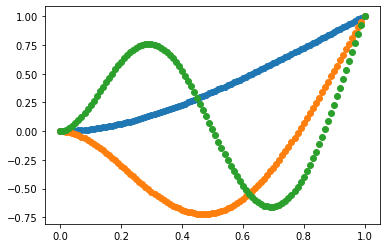

In [17]:
distancias = np.linspace(0,Largo,(len(Modos[:,0])+1))
for i in range(3): #en(vl[:,0])):
        VL = Modos[:,i].reshape(-1,1)
        modo = np.append(np.array([0]),VL)
        plt.plot(distancias,modo,'o',label = i)  
        
plt.show()